## **COMP-2704 (234311) Supervised Machine Learning**
## **Felix Cazarez**
## **EDA - Exploratory Data Analysis**
## Project: Stroke Prediction


## **Summary**
An accurate database was selected from Kaggle to predict future stroke attacks in patients. Ten features were chosen, with one dropped. The variables were divided into two groups, categorical and numerical, which contribute to the model as behavioural variables. During cleaning, 201 null values(4%) were replaced with the mean, and BMI dropped due to the weak correlation with the tag. One column had a label of positive or negative stroke and the label. Two features had imbalanced data and outliers but were kept and will be treated with resampling, class weighting or data augmentation to avoid loss of prediction accuracy. (100 words)




 





## ***Use Case:*** 
The prediction of strokes will be usefull for neurologist, cardiologist, hospitals, governments and patients to detect possible risk of stroke attack on time and treat this dangerous problem on time in a preventive maner. 
Than means savings in medical treatment for government, improve the population productivity ans a better quality of life for patients and people. 

The database was extracted from Kaggle from the attached source, special thank to Federico Soriano Palacios for de database. 

## DataBase Source:
  fedesoriano. (n.d.). Stroke prediction dataset. Kaggle. Retrieved January 22, 2023, from https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset



## Importing libraries

In [2]:
# !pip install -U scikit-learn
! pip install pydotplus

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import utils

# import plotly as plt

from sklearn.impute import KNNImputer
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

### **Importing data set:**, this data set was extracted from this location in Kaggle: stroke-prediction-dataset, and it was uploaded to my Github to make it available anywhere.

In [4]:
url = 'https://raw.githubusercontent.com/Fcazarez/DSML/main/healthcare-dataset-stroke-data.csv'

In [5]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', encoding="unicode_escape")
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

### Use describe and info to have an idea of the dataset

In [6]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### After this command missing values were found, we need to drop or fill with the mean 

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### **Missing Values Handling:** There are 201 null values in bmi. 3,93% of Dataframe, so we could delete with afecting prediction. Even though we can fill it with te mean to not loose any information.

In [9]:
df.shape

(5110, 12)

In [10]:
df["bmi"].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

### Verifying the shape of the data ti decide if drop or keep with them

In [11]:
df["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

### mean calculation is about 28.89

In [12]:
df["bmi"].fillna(df["bmi"].mean(), inplace =True)

In [13]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Filling the null values with KNNImputer feature with k-Nearest Neighbors method from SciLearn

In [14]:
imputer = KNNImputer(n_neighbors = 5)
df["bmi"]= imputer.fit_transform(df[["bmi"]])

In [15]:
df["bmi"].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [16]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### **Verifying duplicated values:** 

In [17]:
df.duplicated("id").sum()

0

### **Dimensionally reduction:** Id parameter is not needed, it could be drooped. Bmi was droped becouse the weak correlation. 

In [18]:
df.drop("id",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


### Check the correlation of numerical values:

### Depict the correlations to a better appreciation. 

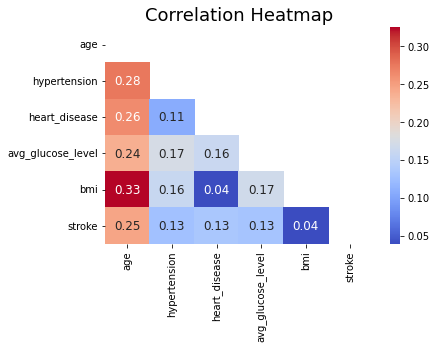

In [19]:
corr = df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns, 
            yticklabels=corr.columns, 
            cmap='coolwarm',
            annot=True,
            annot_kws={'size': 12},
            fmt=".2f",
            cbar=True,
            mask= np.triu(np.ones_like(corr, dtype=np.bool_))
           )
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

### the correlation between the Tag (stroke) and bmi is too weak, better we drop it

In [20]:
df.drop("bmi",axis=1,inplace=True)


In [21]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   smoking_status  stroke  
0          Urban             228.69  formerly smoked       1  
1          Rural             202.21     never smoked       1  
2          Rural             105.92     never smoked       1  
3          Urban             171.23           smokes       1  
4          Rural             174.12     never smoked       1

### **Remove outliers:**

In [22]:

plt.rcParams["figure.figsize"]=(10, 10)

<Figure size 1440x720 with 0 Axes>

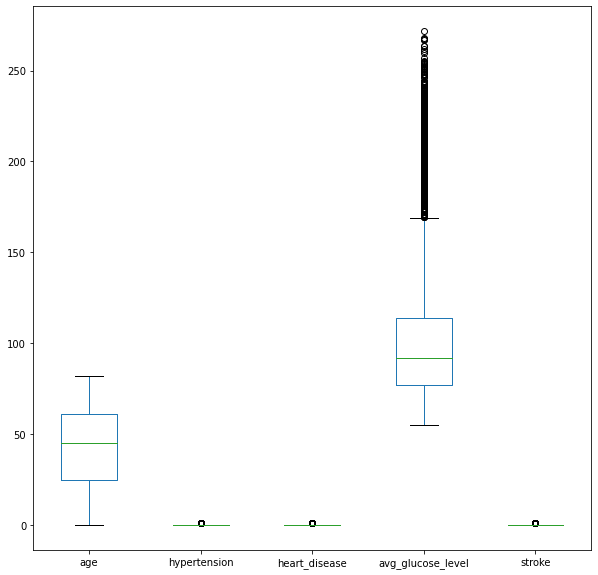

In [23]:
plt.figure(figsize= (20,10))
df.plot(kind = "box")
plt.show()

### Explore the shape of glucose data 

In [24]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

### Is not posssible to drop the outliers, so those are too many and we can affect the predictions

In [25]:
df[df["avg_glucose_level"]>114.090000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 5108
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1277 non-null   object 
 1   age                1277 non-null   float64
 2   hypertension       1277 non-null   int64  
 3   heart_disease      1277 non-null   int64  
 4   ever_married       1277 non-null   object 
 5   work_type          1277 non-null   object 
 6   Residence_type     1277 non-null   object 
 7   avg_glucose_level  1277 non-null   float64
 8   smoking_status     1277 non-null   object 
 9   stroke             1277 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 109.7+ KB


In [26]:
df["avg_glucose_level"].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

## **Features definition:**
### 1) **gender:** "Male", "Female" or "Other"
### 2) **age:** age of the patient
### 3) **hypertension:** 0 No, 1 Yes (If the patient has previous hypertention diagnosis of)
### 4) **heart_disease:** 0 = No, 1 = Yes (If the patient has previous heart attacks)
### 5) **ever_married:** "No" or "Yes"
### 6) **work_type:** "Govt_jov", "Never_worked", "Private" or "Self-employed" (If patient works for a prived institution, government, is independient employee or unemployed)
### 7) **Residence_type:** "Rural" or "Urban"
### 8) **avg_glucose_level:** average glucose level in blood (If the patient has previous diabetes diagnosis or high lebels of sugar in blood)
### 9) **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 399.3+ KB


### **Numerical features analysis:** age, hypertension, heart_disease, avg_glucose_level, are numerical, we can analyze those

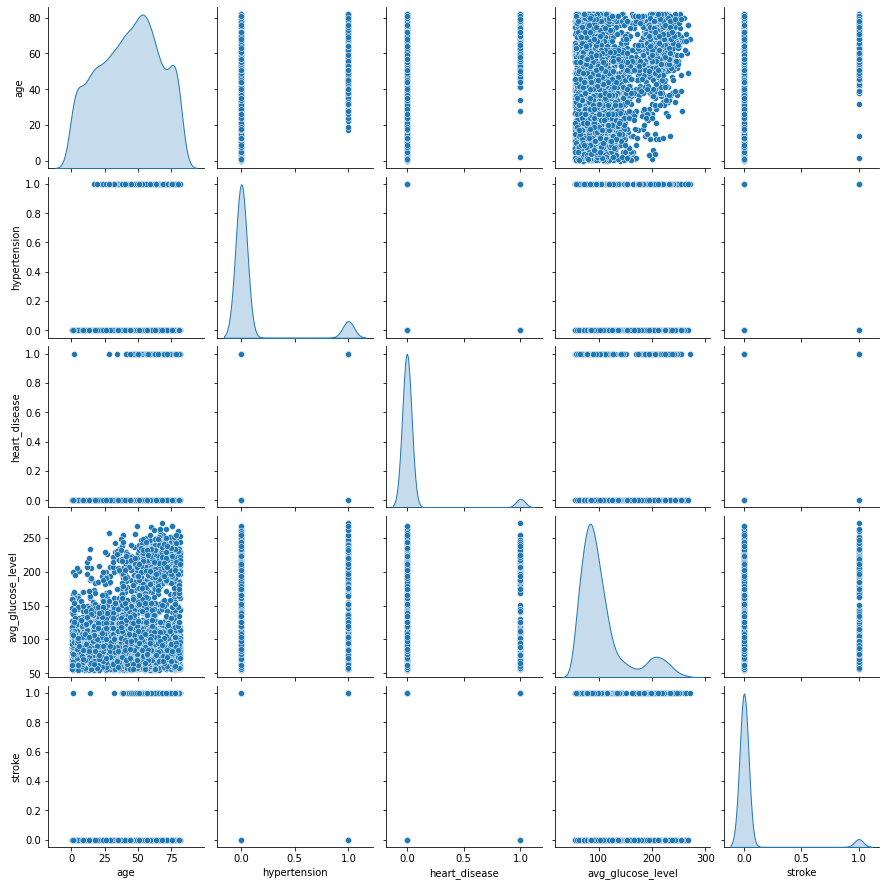

In [28]:
sns.pairplot(df, kind='scatter', diag_kind='kde', markers=["o", "s", "D"])

In [29]:
df_float = df[["age", "hypertension", "heart_disease", "avg_glucose_level", "stroke"]]
df_float.head()

age  hypertension  heart_disease  avg_glucose_level  stroke
0  67.0             0              1             228.69       1
1  61.0             0              0             202.21       1
2  80.0             0              1             105.92       1
3  49.0             0              0             171.23       1
4  79.0             1              0             174.12       1

### In General variables are bell shaped. Stroke is imbalanced as well as glucose, hypertension and hearth disease. 

### **Categorical features analysis:**

In [30]:
df_categorical = df[["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]]

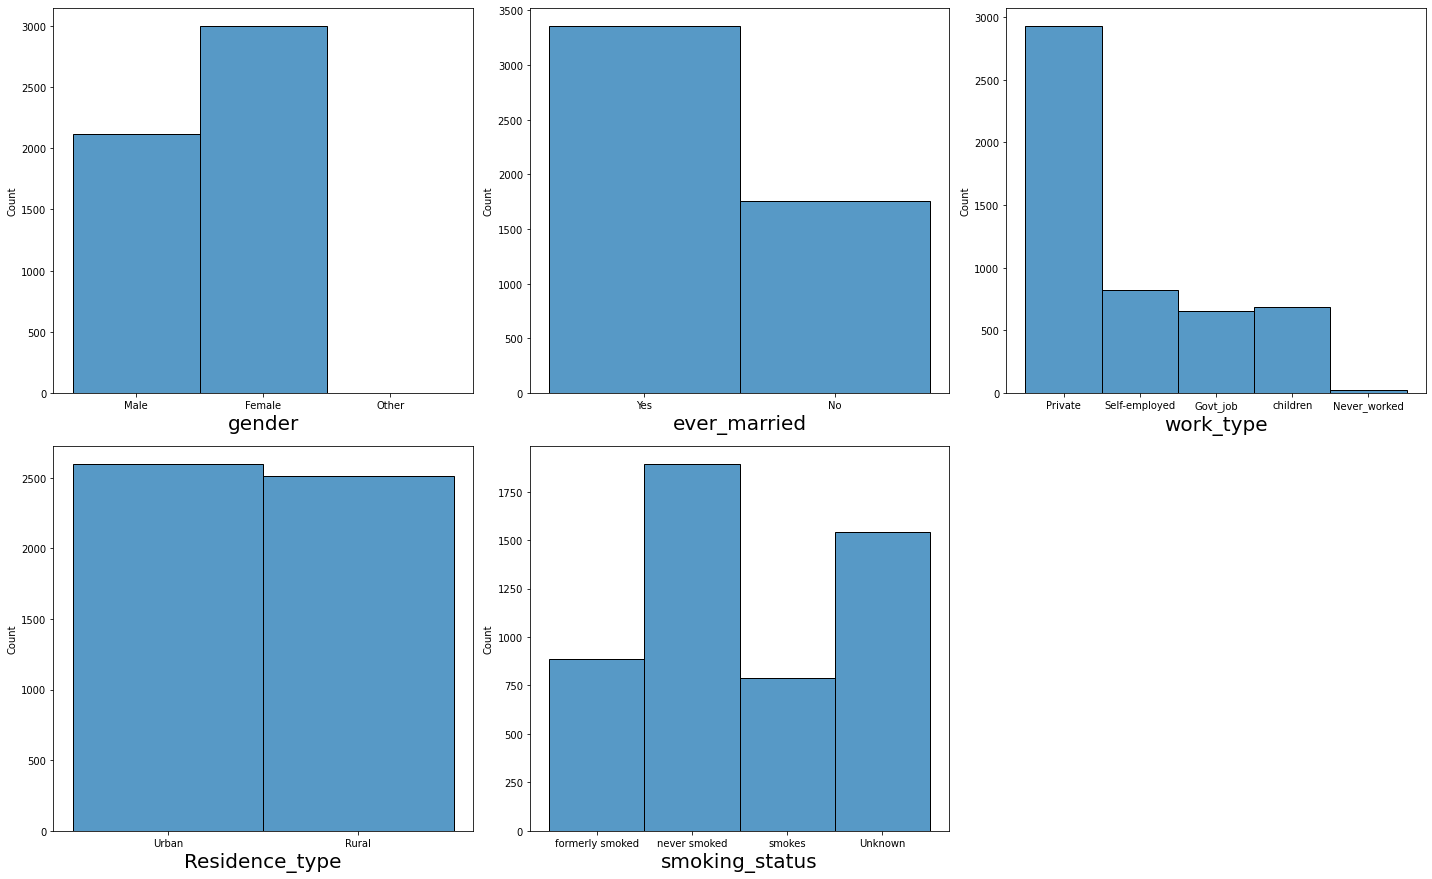

In [31]:
plt.figure(figsize = (20,30), facecolor = "white")
plotnumber = 1
for column in df_categorical:
  if plotnumber <= 15:
    ax = plt.subplot(5,3,plotnumber)
    sns.histplot(df_categorical[column])
    plt.xlabel(column, fontsize=20)
  plotnumber += 1
plt.tight_layout()

### The data in categorical values is almost well disributed, work type has a bias to the right, which is correct.

## **Label Encoding:** Remove all tags and replace them for categorical numbers to make it easy for normalization

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 399.3+ KB


### All dtype as object should be encoded as numbers

In [33]:
enc = LabelEncoder()

### encoding categorical values

In [34]:
gender = enc.fit_transform(df["gender"])
ever_married = enc.fit_transform(df["ever_married"])
work_type = enc.fit_transform(df["work_type"])
Residence_type = enc.fit_transform(df["Residence_type"])
smoking_status = enc.fit_transform(df["smoking_status"])

### Replacing encoding in data frame

In [35]:
df["gender"]= gender
df["ever_married"]= ever_married
df["work_type"]= work_type
df["Residence_type"]= Residence_type
df["smoking_status"]= smoking_status

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   smoking_status     5110 non-null   int64  
 9   stroke             5110 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 399.3 KB


### Now all are numbers

In [37]:
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level  smoking_status  stroke  
0               1             228.69               1       1  
1               0             202.21               2       1  
2               0             105.92               2       1  
3               1             171.23               3       1  
4               0             174.12               2       1

## **Normalize data:** Make data bell shaped, expresed in std dev of each own mean, and independient of units, easy to work with.

In [38]:
std = StandardScaler()

In [39]:
df_std = std.fit_transform(df)

In [40]:
df_std

array([[ 1.18807255,  1.05143428, -0.32860186, ...,  2.70637544,
        -0.35178071,  4.41838074],
       [-0.840344  ,  0.78607007, -0.32860186, ...,  2.12155854,
         0.58155233,  4.41838074],
       [ 1.18807255,  1.62639008, -0.32860186, ..., -0.0050283 ,
         0.58155233,  4.41838074],
       ...,
       [-0.840344  , -0.36384151, -0.32860186, ..., -0.51144264,
         0.58155233, -0.22632726],
       [ 1.18807255,  0.34379639, -0.32860186, ...,  1.32825706,
        -0.35178071, -0.22632726],
       [-0.840344  ,  0.03420481, -0.32860186, ..., -0.46086746,
        -1.28511375, -0.22632726]])

## **Discusion**
The data is ready for the next step, modelling. 
Throughout the EDA 2 variables were dropped, one identified each data, and the other was poorly correlated with the target. In the following steps likely, we will use logistic regression with 9 statistical features for one target. 
the most essential features, like glucose, hypertension and heart disease, are imbalanced, as well as the target. We likely will use data augmenting to fill data and make the model more accurate.  (78 words)



# Assignment 2 Final   (Deliverable starts here)

#### Summary: 
This deliverable provides an overview of the process for training a decision tree model using a grid search approach to optimize hyperparameters. The dataset was obtained from Kaggle and was subjected to exploratory data analysis prior to model training. The initial model, developed using default parameters, was found to be overfitted and required customization to improve performance.

The critical performance metric for this analysis was precision, which was used in conjunction with accuracy to identify the optimal model. However, even the best performing model continued to produce false negative predictions, which may be attributed to the arbitrary selection of hyperparameter values.

Despite this limitation, the overall performance of the model is deemed acceptable. Further refinements to the model may be necessary to achieve higher precision levels and minimize false negatives. These findings emphasize the importance of conducting a systematic search of hyperparameters to optimize model performance and minimize potential biases.

### 2. Preprocessing: Develop code to prepare the data for training your models; note that each model may require its own form of preprocessing. For example, in models that require distance metrics it is useful to standardize the data (e.g. write each column in terms of its z-score), while for text data you may wish to remove stopwords (e.g. 'a', 'the', 'is', etc.). Decide which features to train your model with and split the data into training/validation/testing sets using appropriate proportions. Be sure to provide a written explanation of what you are doing.

We have 2 kind of data ready to train the model, one is a pandas dataframe and the other one is a numpy array. 

### Decision Trees:
### •	Develop a decision tree using the sci-kit learn module.
### •	If you have a classification problem, try both Gini impurity index and entropy as hyperparameter choices. (If you are doing regression, you will use MSE to branch the data at each level.)



In [42]:
# Bin the 'stroke' column into two categories: 0 (no stroke) and 1 (has stroke)
df['stroke'] = pd.cut(df['stroke'], bins=[-1, 0, 1], labels=[0, 1])

# Separate the features and labels
X = df.drop('stroke', axis=1)  # X = Feaures
y = df['stroke'] 

In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
              # y = Labels

In [44]:
print('X_train, Training data set shape : ', X_train.shape)
print('X_val, Validation data set shape : ', X_val.shape)
print('X_test, Testing data set shape : ', X_test.shape)

X_train, Training data set shape :  (4088, 9)
X_val, Validation data set shape :  (511, 9)
X_test, Testing data set shape :  (511, 9)


In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels for the validation data
y_pred = clf.predict(X_val)

# Evaluate the accuracy of the model on validation data
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy on validation dataset:', round(accuracy, 2)*100, '%')

# Generate and print classification report
report = classification_report(y_val, y_pred)
print(report)


Accuracy on validation dataset: 91.0 %
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       480
           1       0.20      0.16      0.18        31

    accuracy                           0.91       511
   macro avg       0.57      0.56      0.57       511
weighted avg       0.90      0.91      0.91       511



In [49]:
# Visualize the decision tree using the graphviz library
dot_data = export_graphviz(clf, out_file=None, filled=True, rounded=True,
                feature_names=X.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [52]:
# Fit the classifier on the validating data
clf.fit(X_val, y_val)

# Predict the labels for the test data
y_pred = clf.predict(X_val)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print('Accuracy:', round(accuracy, 2)*100, ' %')

# Generate and print classification report
report = classification_report(y_val, y_pred)
print(report)

Accuracy: 100.0  %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00        31

    accuracy                           1.00       511
   macro avg       1.00      1.00      1.00       511
weighted avg       1.00      1.00      1.00       511



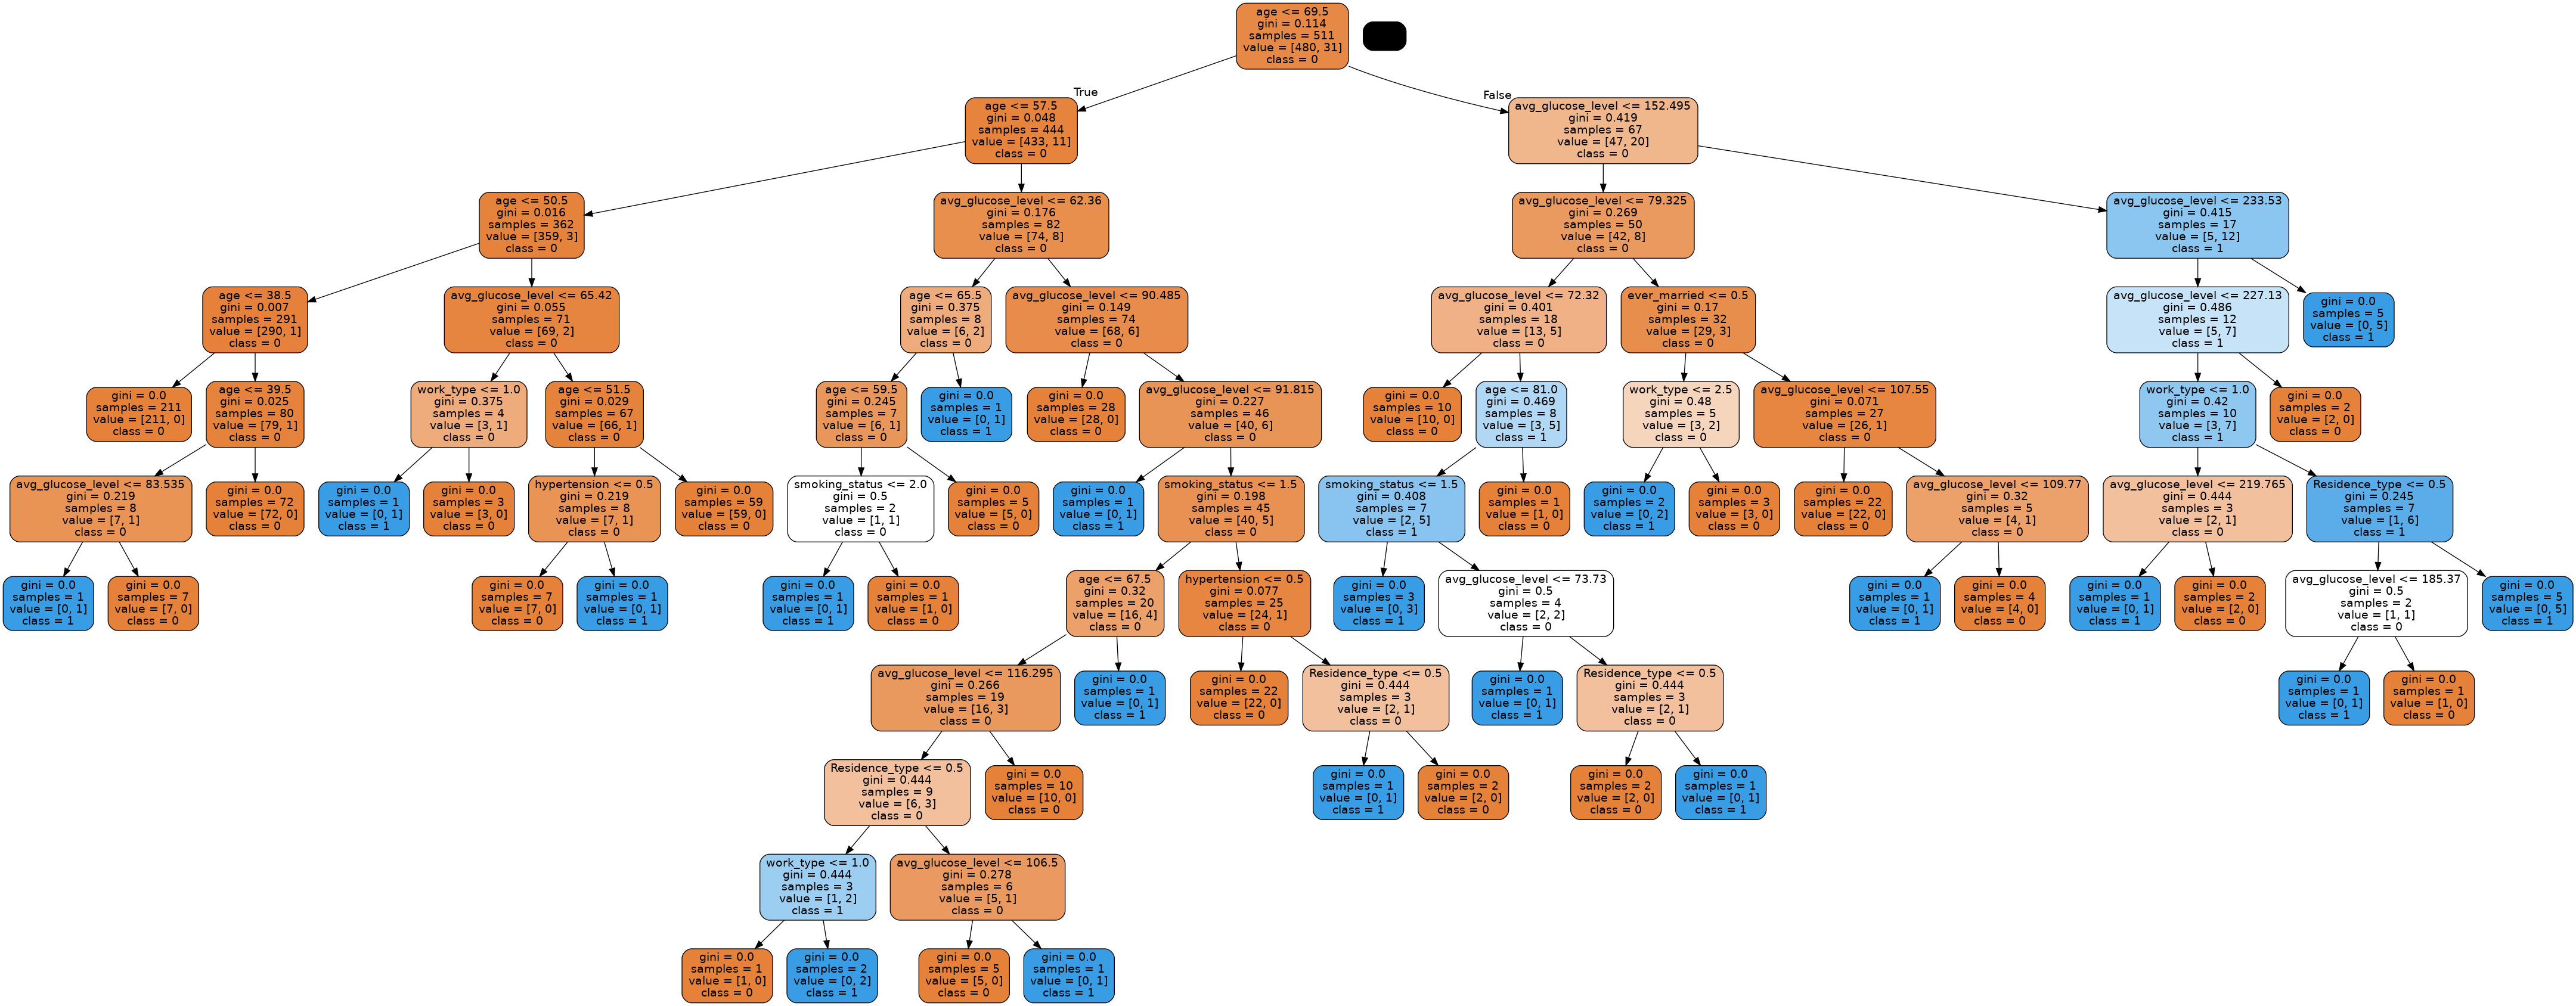

In [53]:
# Visualize the decision tree using the graphviz library
dot_data = export_graphviz(clf, out_file=None, filled=True, rounded=True,
                feature_names=X.columns, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


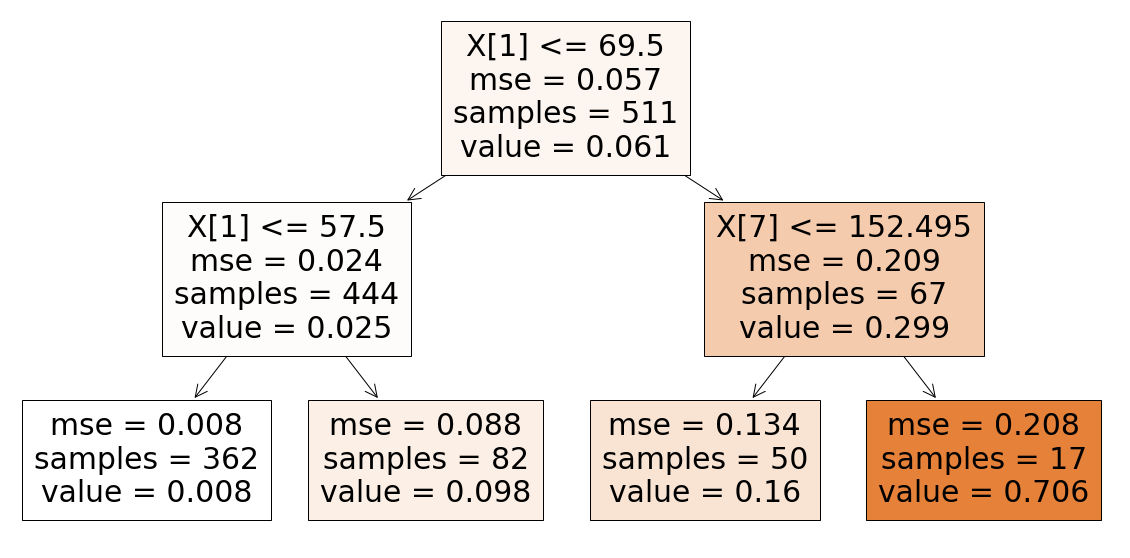

In [55]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Create a decision tree regressor
dt_regressor = DecisionTreeRegressor(max_depth=2)

# Train the model on your data
dt_regressor.fit(X_val, y_val)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_regressor, filled=True)
plt.show()

### •	Explain what the following hyperparameters control: max_depth, max_features, min_impurity_decrease, min_samples_leaf, min_samples_split.

max_depth: the maximum allowed depth. 
If this value is set too high, the tree may overfit the training data and not generalize well to new data. 
If it is set too low, the tree may underfit and not capture all the relevant patterns in the data.

max_features: the maximum number of features considered at each split (useful for
when there are too many features, and the training process takes too long). 
If this value is set too high, the tree may overfit the training data by considering too many irrelevant features. 
If it is set too low, the tree may underfit and miss important patterns in the data.

min_impurity_decrease: the decrease in impurity must be higher than this threshold to
split a node. This hyperparameter controls the minimum amount by which the impurity measure (e.g., Gini index, entropy) must decrease for a split to be considered. 
If this value is set too high, the tree may not split on some important features because they do not decrease impurity enough. 
If it is set too low, the tree may split on irrelevant features and overfit the data.

min_samples_leaf: the minimum number of samples required for a leaf node. If a split
leaves a leaf with less than this number of samples, the split is not performed. 
If this value is set too low, the tree may overfit the data by creating very specific leaves for very few samples. 
If it is set too high, the tree may underfit and not capture all the relevant patterns in the data.

min_samples_split: the minimum number of samples required to split a node. 
If this value is set too low, the tree may overfit the data by splitting on irrelevant features. 
If it is set too high, the tree may underfit and not capture all the relevant patterns in the data.

### •	Try at least five different choices for the set of hyperparameters -- a grid search is encouraged.
### •	For each model:
### i.	Find predictions using the validation set.
### ii.	Use the score() function to display the training/validation accuracy (for classification) or coefficient of determination (for regression).

I have developed a grid search approach to fine-tune the hyperparameters of a decision tree classifier to optimize its performance on our specific dataset. In this approach, I have carefully selected four hyperparameters to customize the decision tree model:

criterion: This hyperparameter determines the function that the decision tree uses to measure the quality of a split. We have considered two popular measures, 'gini' and 'entropy', to test which one results in a better-performing model.

max_depth: This hyperparameter controls the maximum depth of the decision tree. A deeper tree can more accurately model the training data, but may also overfit to the noise in the data and perform poorly on new data. We have tested different maximum depths (3, 5, 7, 10, 15) to find the optimal value that balances the model's complexity and performance.

min_samples_leaf: This hyperparameter sets the minimum number of samples required to be at a leaf node of the decision tree. A higher value will result in less complex trees, which may help to prevent overfitting. We have tested different minimum sample leaf sizes (1, 5, 10) to find the optimal value.

min_samples_split: This hyperparameter sets the minimum number of samples required to split an internal node of the decision tree. A higher value will also result in less complex trees and may help to prevent overfitting. We have tested different minimum sample split sizes (2, 5, 10) to find the optimal value.

By testing various combinations of these hyperparameters, we can determine the optimal values for each one that produce the best-performing decision tree model for our specific dataset. We have evaluated the performance of each model by measuring its mean test score, which is the average of the model's accuracy across different folds in the cross-validation process. Additionally, we have also reported the training, validation, and testing accuracies for each model in the table to provide a comprehensive view of its performance.

In [56]:
# Define the hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 2, 3, 4, 5, 6, 7],
              'min_samples_leaf': [1, 2,3, 4, 5,6, 7],
              'min_samples_split': [2, 4, 6, 8, 10]}

# Create the decision tree classifier object
dt = DecisionTreeClassifier()

# Create the grid search object
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', refit=True, verbose=3, n_jobs=-1)


Fitting 5 folds for each of 490 candidates, totalling 2450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy', verbose=3)

In [57]:
# show which parameters gave the best results
grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [59]:
# Fit the classifier on the validatin data
grid.fit(X_val, y_val)

# Predict the labels for the validation data
grid_pred_val = grid.predict(X_val)

# Evaluate the accuracy of the model on validation data
accuracy = accuracy_score(y_val, grid_pred_val)
print('Accuracy on validation dataset:', round(accuracy, 2)*100, '%')

# Generate and print classification report
report = classification_report(y_val, grid_pred_val)
print(report)


Fitting 5 folds for each of 490 candidates, totalling 2450 fits
Accuracy on validation dataset: 95.0 %
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       480
           1       0.71      0.39      0.50        31

    accuracy                           0.95       511
   macro avg       0.83      0.69      0.74       511
weighted avg       0.95      0.95      0.95       511



In [60]:
# Define the hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 2, 3, 4, 5, 6, 7],
              'min_samples_leaf': [1, 2,3, 4, 5,6, 7],
              'min_samples_split': [2, 4, 6, 8, 10]}

def compute_accuracy(X_train, y_train, X_val, y_val, X_test, y_test, dt, param_grid):
    results = []
    for criterion in param_grid['criterion']:
        for max_depth in param_grid['max_depth']:
            for min_samples_leaf in param_grid['min_samples_leaf']:
                for min_samples_split in param_grid['min_samples_split']:
                    dt.set_params(criterion=criterion, 
                                  max_depth=max_depth, 
                                  min_samples_leaf=min_samples_leaf, 
                                  min_samples_split=min_samples_split )
                    dt.fit(X_train, y_train)
                    y_val_pred = dt.predict(X_val)
                    train_accuracy = dt.score(X_train, y_train)
                    val_accuracy = dt.score(X_val, y_val)
                    test_accuracy = dt.score(X_test, y_test)
                    tn, fp, fn, tp = confusion_matrix(y_val, y_val_pred).ravel()
                    results.append({'criterion': criterion,
                                    'max_depth': max_depth,
                                    'min_samples_leaf': min_samples_leaf,
                                    'min_samples_split': min_samples_split,
                                    'train_accuracy %': round(train_accuracy*100, 2),
                                    'val_accuracy %': round(val_accuracy*100, 2),
                                    'test_accuracy %': round(test_accuracy*100, 2),
                                    'tn': tn,
                                    'fp': fp,
                                    'fn': fn,
                                    'tp': tp,
                                    'precision': tp / (tp + fp),
                                    'recall': tp / (tp + fn),
                                    'f1_score': 2 * ((tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn))),
                                    'specificity': tn / (tn + fp)
                                   })
    return pd.DataFrame(results)

In [61]:
# Create the SVM classifier object
dt = DecisionTreeClassifier()

# Compute accuracy for each combination of hyperparameters
results = compute_accuracy(X_train, y_train, X_val, y_val, X_test, y_test, dt, param_grid)

/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars
/home/ubuntu/venv/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: in

In [68]:
# Create a dataframe to store the results
df_results = pd.DataFrame(columns=['criterion', 
                                   'max_depth', 
                                   'min_samples_leaf', 
                                   'min_samples_split',
                                   'train Acc %', 
                                   'val Acc %', 
                                   'Test Acc %', 
                                   'tn', 'fp', 'fn', 'tp', 
                                   'precision', 'recall', 'f1_score', 'specificity'])

# Add the results to the dataframe
for _, row in results.iterrows():
    df_results = df_results.append({'criterion': row['criterion'],
                                    'max_depth': row['max_depth'],
                                    'min_samples_leaf': row['min_samples_leaf'],
                                    'min_samples_split': row['min_samples_split'],
                                    'train Acc %': row['train_accuracy %'],
                                    'val Acc %': row['val_accuracy %'],
                                    'Test Acc %': row['test_accuracy %'],
                                    'tn': row['tn'],
                                    'fp': row['fp'],
                                    'fn': row['fn'],
                                    'tp': row['tp'],
                                    'precision': row['precision'],
                                    'recall': row['recall'], 
                                    'f1_score': row['f1_score'],
                                    'specificity': row['specificity']
                                   }, ignore_index=True)



criterion max_depth min_samples_leaf min_samples_split  train Acc %  \
175      gini         6                1                 2        95.91   
176      gini         6                1                 4        95.89   
177      gini         6                1                 6        95.84   
178      gini         6                1                 8        95.84   
214      gini         7                1                10        95.99   
..        ...       ...              ...               ...          ...   
154      gini         5                3                10        95.57   
153      gini         5                3                 8        95.57   
152      gini         5                3                 6        95.62   
151      gini         5                3                 4        95.62   
489   entropy         7                7                10        95.55   

     val Acc %  Test Acc %   tn fp  fn tp  precision    recall  f1_score  \
175      93.74       93.93  477  3  29  2   0.400000  0.064516  0.111111   
176      93.74       93.93  477  3  29  2   0.400000  0.064516  0.111111   
177      93.54       93.93  476  4  29  2   0.333333  0.064516  0.108108   
178      93.54       93.93  476  4  29  2   0.333333  0.064516  0.108108   
214      93.74       93.74  477  3  29  2   0.400000  0.064516  0.111111   
..         ...         ...  ... ..  .. ..        ...       ...       ...   
154      93.54       93.93  478  2  31  0   0.000000  0.000000       NaN   
153      93.54       93.93  478  2  31  0   0.000000  0.000000       NaN   
152      93.54       93.93  478  2  31  0   0.000000  0.000000       NaN   
151      93.54       93.93  478  2  31  0   0.000000  0.000000       NaN   
489      93.74       93.93  479  1  31  0   0.000000  0.000000       NaN   

     specificity  
175     0.993750  
176     0.993750  
177     0.991667  
178     0.991667  
214     0.993750  
..           ...  
154     0.995833  
153     0.995833  
152     0.995833  
151     0.995833  
489     0.997917  

[490 rows x 15 columns]

In [69]:
df_results = df_results.sort_values(by=['val Acc %'], ascending=False)

    # Print the dataframe
df_results

criterion max_depth min_samples_leaf min_samples_split  train Acc %  \
107      gini         4                1                 6        95.45   
74       gini         3                1                10        95.45   
73       gini         3                1                 8        95.45   
70       gini         3                1                 2        95.45   
71       gini         3                1                 4        95.45   
..        ...       ...              ...               ...          ...   
148      gini         5                2                 8        95.57   
149      gini         5                2                10        95.57   
433   entropy         6                3                 8        95.52   
210      gini         7                1                 2        96.33   
211      gini         7                1                 4        96.28   

     val Acc %  Test Acc %   tn fp  fn tp  precision    recall  f1_score  \
107      94.13       93.93  480  0  30  1        1.0  0.032258  0.062500   
74       94.13       93.93  480  0  30  1        1.0  0.032258  0.062500   
73       94.13       93.93  480  0  30  1        1.0  0.032258  0.062500   
70       94.13       93.93  480  0  30  1        1.0  0.032258  0.062500   
71       94.13       93.93  480  0  30  1        1.0  0.032258  0.062500   
..         ...         ...  ... ..  .. ..        ...       ...       ...   
148      93.54       93.93  478  2  31  0        0.0  0.000000       NaN   
149      93.54       93.93  478  2  31  0        0.0  0.000000       NaN   
433      93.54       93.93  478  2  31  0        0.0  0.000000       NaN   
210      93.35       93.74  476  4  30  1        0.2  0.032258  0.055556   
211      93.35       93.74  476  4  30  1        0.2  0.032258  0.055556   

     specificity  
107     1.000000  
74      1.000000  
73      1.000000  
70      1.000000  
71      1.000000  
..           ...  
148     0.995833  
149     0.995833  
433     0.995833  
210     0.991667  
211     0.991667  

[490 rows x 15 columns]

In [70]:
print('Best model:')
df_results[0:1]

Best model:


criterion max_depth min_samples_leaf min_samples_split  train Acc %  \
107      gini         4                1                 6        95.45   

     val Acc %  Test Acc %   tn fp  fn tp  precision    recall  f1_score  \
107      94.13       93.93  480  0  30  1        1.0  0.032258    0.0625   

     specificity  
107          1.0

In [65]:
print('Best model according to grid: ')
grid.best_params_

Best model according to grid: 


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

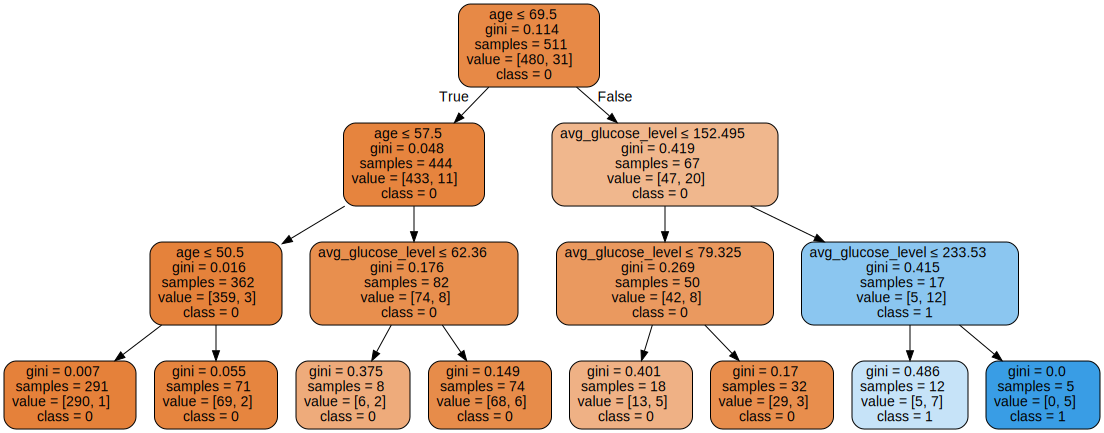

In [66]:
from sklearn.tree import export_graphviz
import graphviz

# Get the best estimator from the grid search
best_dt = grid.best_estimator_

class_names = y_train.unique().astype(str)

# Export the decision tree to a DOT format
dot_data = export_graphviz(best_dt, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=class_names,  # Pass class_names here
                           filled=True, rounded=True,  
                           special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Add a title node to the graph
dot_data = f'strict digraph "Decision Tree" {{\nlabel="Best training for Validation DataSet"\n{dot_data}\n}}'

# Show the graph
graph


### iii.	Decide which metrics to use in analysis (e.g. absolute error, RMSE, MSE, recall, precision, Fβ score, etc.); calculate them using the validation set and display them. Explain how these metrics will help you decide which model is best.

I have built a grid, fitting 5 folds for each of 490 candidates, totalling 2450 fits to find the best model

The hyperparameters I chos were the next: 

criterion: This hyperparameter determines the measure of impurity used to split the nodes of the decision tree. Entropy and Gini are two popular measures, and choosing the right criterion can help improve the model's ability to reduce false negatives. Entropy tends to be more sensitive to changes in the data, so it may be more effective in reducing false negatives.

max_depth: This hyperparameter controls the maximum depth of the decision tree. Increasing the maximum depth can result in a more complex decision tree that can capture more intricate relationships in the data, but it can also increase the risk of overfitting. If reducing false negatives is critical, it may be better to limit the maximum depth to avoid overfitting and improve generalization.

min_samples_leaf: This hyperparameter sets the minimum number of samples required to form a leaf node in the decision tree. Increasing this parameter can help prevent overfitting and improve generalization. However, setting it too high may result in a model that is too simple and underfits the data.

min_samples_split: This hyperparameter sets the minimum number of samples required to split an internal node in the decision tree. Increasing this parameter can also help prevent overfitting and improve generalization. However, setting it too high may result in a model that is too simple and underfits the data.

To build the best model, I used techniques like grid search to explore the hyperparameter space and find the combination of hyperparameters that results in the best performance on my chosen evaluation metric (e.g., Recall). When evaluating the models, you can also use cross-validation to ensure that the performance is consistent across different folds and to reduce the risk of overfitting.



In [71]:
print('Best model according to grid: ')
grid.best_params_

Best model according to grid: 


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [72]:
# Evaluate the accuracy of the model on validation data
accuracy = accuracy_score(y_val, grid_pred_val)
print('Accuracy on validation dataset:', round(accuracy, 2)*100, '%')

# Generate and print classification report
report = classification_report(y_val, grid_pred_val)
print(report)

Accuracy on validation dataset: 95.0 %
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       480
           1       0.71      0.39      0.50        31

    accuracy                           0.95       511
   macro avg       0.83      0.69      0.74       511
weighted avg       0.95      0.95      0.95       511





### iv.	If you have a binary classification model, display the confusion matrix, ROC curve and AUC for the validation set.


In [73]:
# Create a decision tree classifier object with the best model on the grid
best_model1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf= 4, min_samples_split =2)

In [74]:
# Fit the classifier on the validating data
best_model1.fit(X_val, y_val)

# Predict the labels for the test data
y_pred = best_model1.predict(X_val) # fixed to use X_test instead of X_train

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)
cm

array([[475,   5],
       [ 19,  12]])

Text(0.5, 1.0, 'Confusion Matrix')

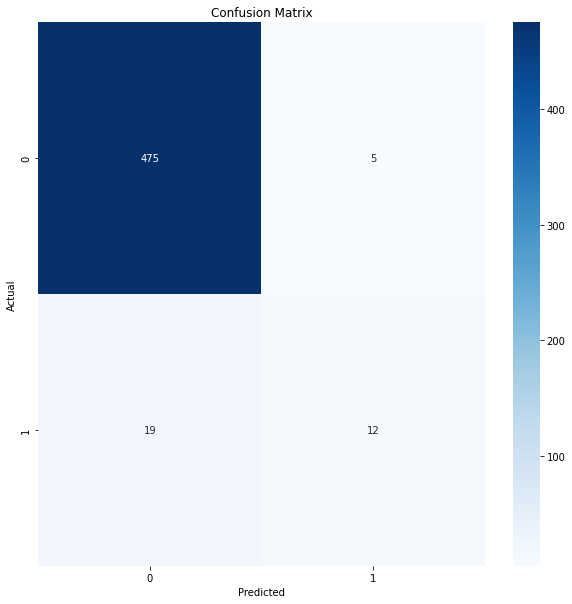

In [75]:
# Use the best model1 to make predictions on the validation set
y_pred = best_model1.predict(X_val)
y_proba = best_model1.predict_proba(X_val)[:, 1]

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [76]:
# using the grid.best_estimator_

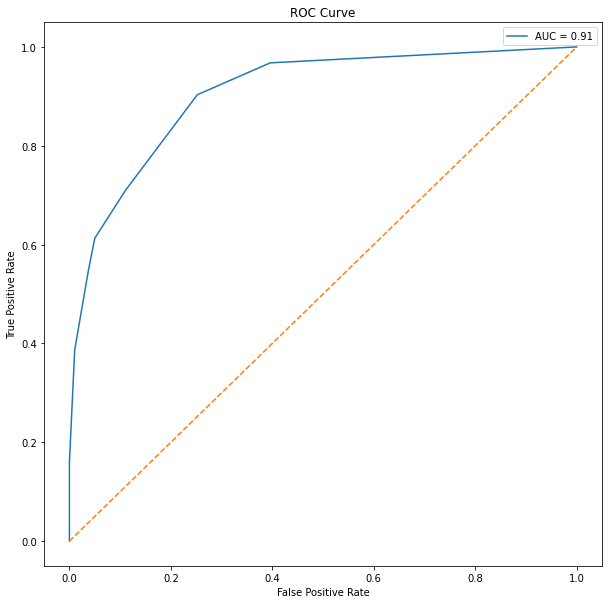

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the validation set
y_val_prob = best_model1.predict_proba(X_val)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Calculate the AUC
auc = roc_auc_score(y_val, y_val_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### •	Compare models and justify a final choice of hyperparameters based on the above quantitative analysis and the use case. Comment on overfitting, underfitting, depth and any qualitative reasoning.

After training 2450 potential models, I have ranked them based on their mean standard error, and have identified the best model. However, despite its selection as the top model, it is still producing errors that are critically important to address. Specifically, false negatives could lead to patients being misdiagnosed as healthy, only to suffer a stroke in the near future.

Initially, the model was overfit with default hyperparameters. However, through a process of grid searching, we were able to identify the best model. Despite this, I remain uncertain that it is the optimal solution. The hyperparameter values were chosen randomly, and I believe that a more systematic approach may help to improve accuracy and precision.

While the model is not underfit, with only four stems on the decision tree out of a possible 19 from the outset, I am committed to continuing to refine its performance until we achieve the desired outcomes.



### •	Use the display¬_tree method in utils9.py to display the chosen decision tree.

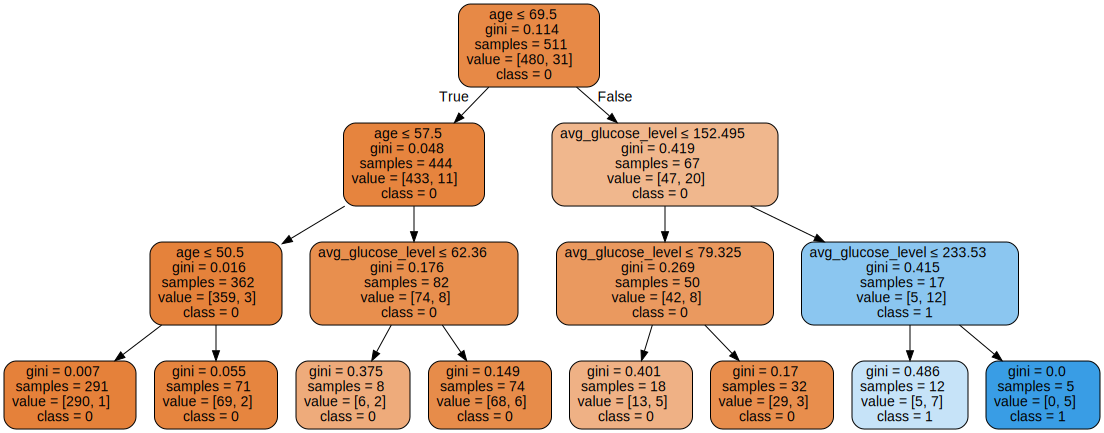

In [79]:
from sklearn.tree import export_graphviz
import graphviz

# Get the best estimator from the grid search
best_dt = best_model1

class_names = y_train.unique().astype(str)

# Export the decision tree to a DOT format
dot_data = export_graphviz(best_dt, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=class_names,  # Pass class_names here
                           filled=True, rounded=True,  
                           special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Show the graph
graph

In [82]:

# code from utils.py 9 decision tree display

def display_tree(dt):
    from six import StringIO  
    from IPython.display import Image  
    from sklearn.tree import export_graphviz
    import pydotplus
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

def plot_regressor(best_model1, X_val, y_val):
    x = np.linspace(0,85,1000)
    plt.scatter(X_val, y_val)
    plt.plot(x, model.predict(x.reshape([-1,1])))
    plt.show()

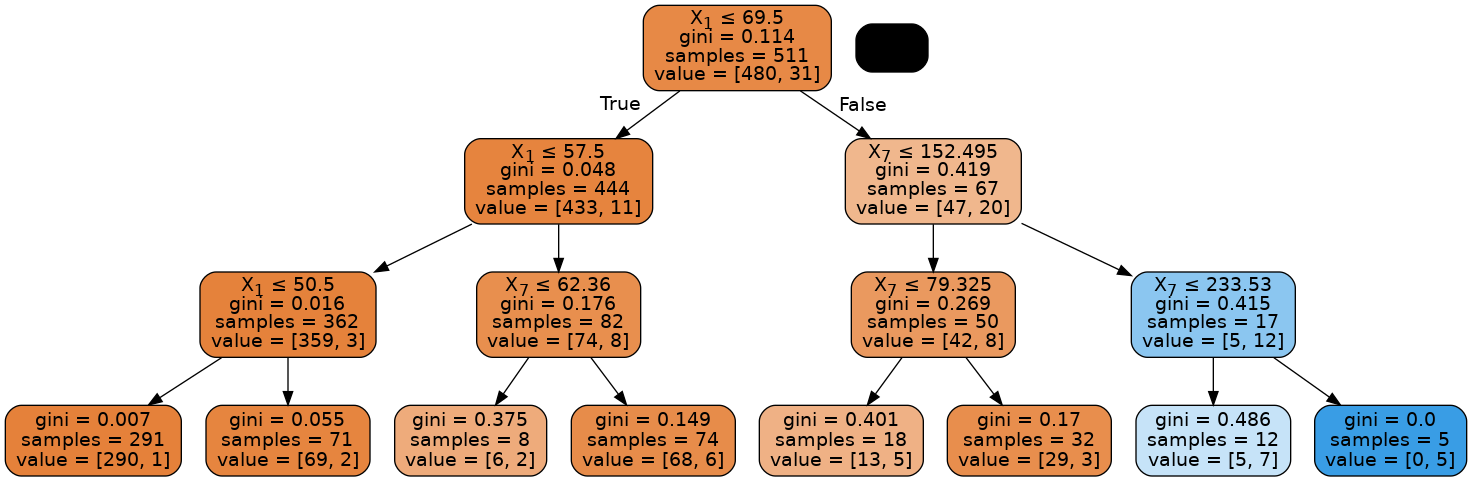

In [84]:

display_tree(best_model1)

In [85]:

import joblib

# Save the trained model
joblib.dump(best_model1, 'dt_best_model.joblib')
     

['dt_best_model.joblib']